#### Import Required Files

In [1]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

from LANDMark import LANDMarkClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

#### Load data

In [2]:
X, y = make_moons(noise=0.3, random_state=0)

#### Split into training and testing sets

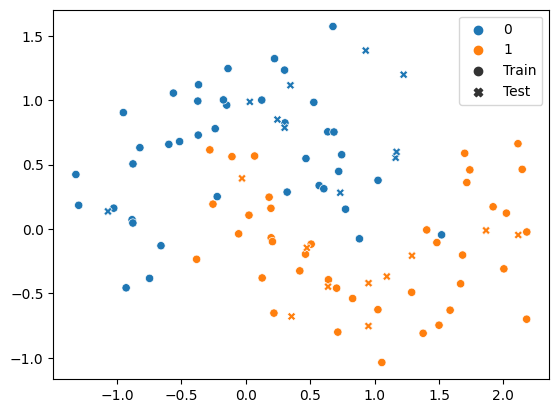

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
         X, 
         y, 
         test_size=0.2, 
         random_state=0, 
         stratify=y)

# Plot moons
sns.scatterplot(x = np.hstack((X_train[:, 0], X_test[:, 0])), 
                y = np.hstack((X_train[:, 1], X_test[:, 1])), 
                hue = np.hstack((y_train, y_test)), 
                style = np.hstack((["Train" for _ in range(X_train.shape[0])],
                                   ["Test" for _ in range(X_test.shape[0])])))
plt.show()
plt.close()

#### Setup model and train. Predict class labels and score. Plot decision boundary. No L1, Neural Network, or Extra Trees

0.95


C:\Users\Josip Rudar - Home\AppData\Local\Temp\ipykernel_17960\3307156328.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  DB.ax_.scatter(X_test[:, 0], X_test[:, 1],


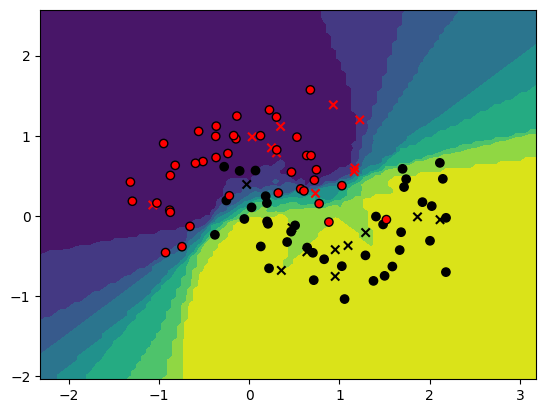

In [4]:
clf = LANDMarkClassifier(n_estimators = 16, use_lm_l1 = False, use_etc = False, use_nnet = False)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)

print(score)

DB = DecisionBoundaryDisplay.from_estimator(estimator = clf,
                                            X = X,
                                            response_method = "predict_proba")

DB.ax_.scatter(X_test[:, 0], X_test[:, 1], 
               c=["black" if entry == 1 else "red" for entry in y_test], 
               edgecolor="k", marker = "x")
DB.ax_.scatter(X_train[:, 0], X_train[:, 1], 
               c=["black" if entry == 1 else "red" for entry in y_train], 
               edgecolor="k")
plt.show()
plt.close()

#### Setup model and train. Predict class labels and score. Plot decision boundary. No L2, Neural Network, or Extra Trees

0.9


C:\Users\Josip Rudar - Home\AppData\Local\Temp\ipykernel_17960\120678232.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  DB.ax_.scatter(X_test[:, 0], X_test[:, 1],


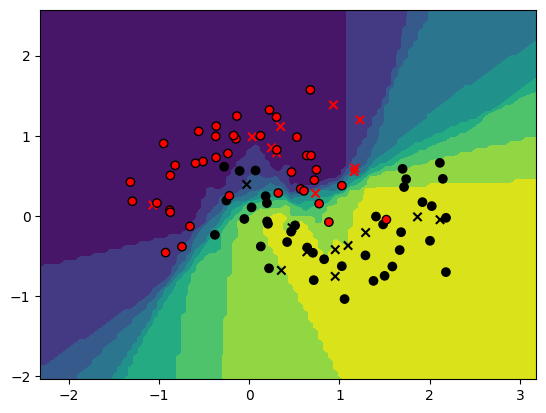

In [5]:
clf = LANDMarkClassifier(n_estimators = 16, use_lm_l2 = False, use_etc = False, use_nnet = False)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)

print(score)

DB = DecisionBoundaryDisplay.from_estimator(estimator = clf,
                                            X = X,
                                            response_method = "predict_proba")

DB.ax_.scatter(X_test[:, 0], X_test[:, 1], 
               c=["black" if entry == 1 else "red" for entry in y_test], 
               edgecolor="k", marker = "x")
DB.ax_.scatter(X_train[:, 0], X_train[:, 1], 
               c=["black" if entry == 1 else "red" for entry in y_train], 
               edgecolor="k")
plt.show()
plt.close()

#### Setup model and train. Predict class labels and score. Plot decision boundary. Only linear models and no Neural Network, or Extra Trees

0.95


C:\Users\Josip Rudar - Home\AppData\Local\Temp\ipykernel_17960\909056146.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  DB.ax_.scatter(X_test[:, 0], X_test[:, 1],


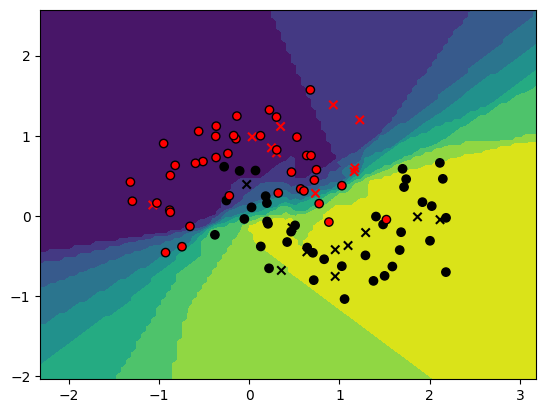

In [6]:
clf = LANDMarkClassifier(n_estimators = 16, use_etc = False, use_nnet = False)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)

print(score)

DB = DecisionBoundaryDisplay.from_estimator(estimator = clf,
                                            X = X,
                                            response_method = "predict_proba")

DB.ax_.scatter(X_test[:, 0], X_test[:, 1], 
               c=["black" if entry == 1 else "red" for entry in y_test], 
               edgecolor="k", marker = "x")
DB.ax_.scatter(X_train[:, 0], X_train[:, 1], 
               c=["black" if entry == 1 else "red" for entry in y_train], 
               edgecolor="k")
plt.show()
plt.close()

#### Default Parameters

d:\miniconda3\envs\testLM\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


1.0


C:\Users\Josip Rudar - Home\AppData\Local\Temp\ipykernel_17960\4195489463.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  DB.ax_.scatter(X_test[:, 0], X_test[:, 1],


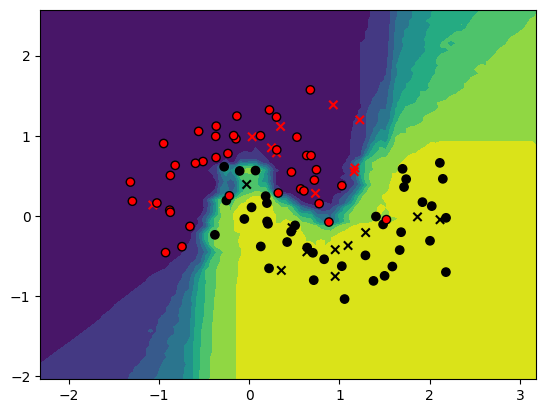

In [7]:
clf = LANDMarkClassifier()
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)

print(score)

DB = DecisionBoundaryDisplay.from_estimator(estimator = clf,
                                            X = X,
                                            response_method = "predict_proba")

DB.ax_.scatter(X_test[:, 0], X_test[:, 1], 
               c=["black" if entry == 1 else "red" for entry in y_test], 
               edgecolor="k", marker = "x")
DB.ax_.scatter(X_train[:, 0], X_train[:, 1], 
               c=["black" if entry == 1 else "red" for entry in y_train], 
               edgecolor="k")
plt.show()
plt.close()

#### Use Cascade Set to True. This parameter extends the data using the result of the previous node's decision function. These new features can then be used at subsequent nodes and this serves as a kind of internal feature engineering. In this dataset it results in the generation of more appropriate decision boundaries when using only linear models for the initial cuts (Extra Trees is used if the number of samples in the minority class is very small, but the initial cuts are made using linear models).

0.9


C:\Users\Josip Rudar - Home\AppData\Local\Temp\ipykernel_17960\4228608051.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  DB.ax_.scatter(X_test[:, 0], X_test[:, 1],


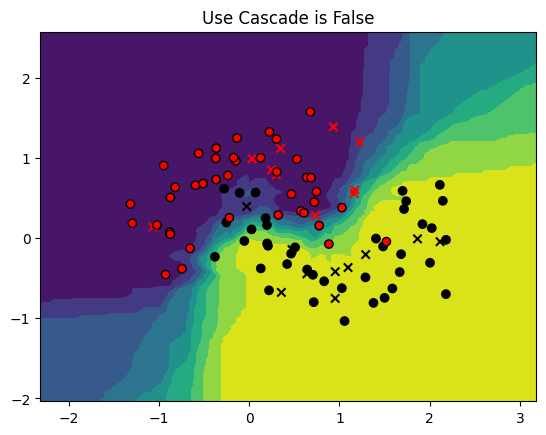

1.0


C:\Users\Josip Rudar - Home\AppData\Local\Temp\ipykernel_17960\4228608051.py:35: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  DB.ax_.scatter(X_test[:, 0], X_test[:, 1],


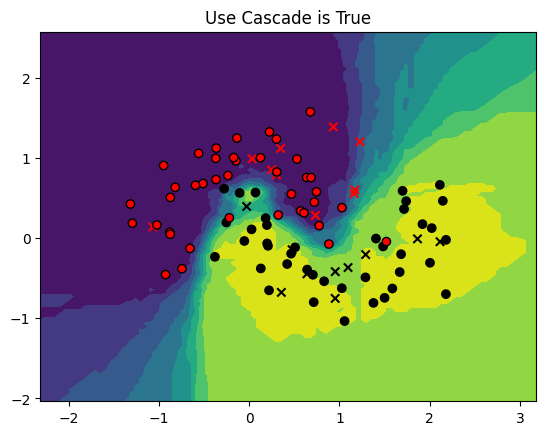

In [8]:
clf = LANDMarkClassifier(n_estimators = 32, use_cascade = False, use_etc = True, etc_max_depth = 3, use_nnet = False)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)

print(score)

DB = DecisionBoundaryDisplay.from_estimator(estimator = clf,
                                            X = X,
                                            response_method = "predict_proba")

DB.ax_.scatter(X_test[:, 0], X_test[:, 1], 
               c=["black" if entry == 1 else "red" for entry in y_test], 
               edgecolor="k", marker = "x")
DB.ax_.scatter(X_train[:, 0], X_train[:, 1], 
               c=["black" if entry == 1 else "red" for entry in y_train], 
               edgecolor="k")
plt.title("Use Cascade is False")
plt.show()
plt.close()

clf = LANDMarkClassifier(n_estimators = 32, use_cascade = True, use_etc = True, etc_max_depth = 3, use_nnet = False)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)

print(score)

DB = DecisionBoundaryDisplay.from_estimator(estimator = clf,
                                            X = X,
                                            response_method = "predict_proba")

DB.ax_.scatter(X_test[:, 0], X_test[:, 1], 
               c=["black" if entry == 1 else "red" for entry in y_test], 
               edgecolor="k", marker = "x")
DB.ax_.scatter(X_train[:, 0], X_train[:, 1], 
               c=["black" if entry == 1 else "red" for entry in y_train], 
               edgecolor="k")
plt.title("Use Cascade is True")
plt.show()
plt.close()

#### Random Oracle. Using the random oracle results in random divisions of the data at the initial node. This creates more diverse trees which are better able to approximate the decision function.

0.95


C:\Users\Josip Rudar - Home\AppData\Local\Temp\ipykernel_17960\2353877849.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  DB.ax_.scatter(X_test[:, 0], X_test[:, 1],


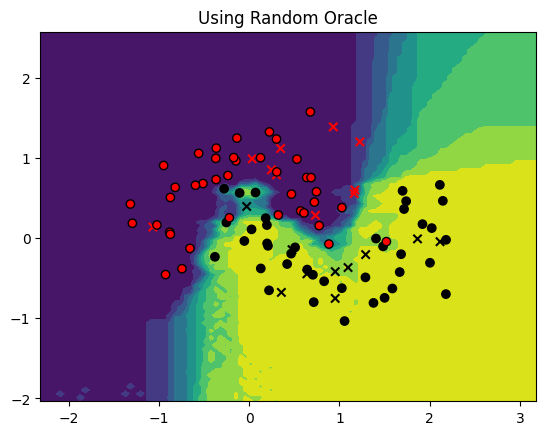

In [ ]:
clf = LANDMarkClassifier(n_estimators = 16, use_oracle = True)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)

print(score)

DB = DecisionBoundaryDisplay.from_estimator(estimator = clf,
                                            X = X,
                                            response_method = "predict_proba")

DB.ax_.scatter(X_test[:, 0], X_test[:, 1], 
               c=["black" if entry == 1 else "red" for entry in y_test], 
               edgecolor="k", marker = "x")
DB.ax_.scatter(X_train[:, 0], X_train[:, 1], 
               c=["black" if entry == 1 else "red" for entry in y_train], 
               edgecolor="k")
plt.title("Using Random Oracle")
plt.show()
plt.close()

clf = LANDMarkClassifier(n_estimators = 16, use_oracle = False)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)

print(score)

DB = DecisionBoundaryDisplay.from_estimator(estimator = clf,
                                            X = X,
                                            response_method = "predict_proba")

DB.ax_.scatter(X_test[:, 0], X_test[:, 1], 
               c=["black" if entry == 1 else "red" for entry in y_test], 
               edgecolor="k", marker = "x")
DB.ax_.scatter(X_train[:, 0], X_train[:, 1], 
               c=["black" if entry == 1 else "red" for entry in y_train], 
               edgecolor="k")
plt.title("Not Using Random Oracle")
plt.show()
plt.close()